In [1]:
import pandas as pd
beer = pd.read_csv('beer.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer.drop('name', axis=1)

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [4]:
km.inertia_

2427.507164285714

In [5]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [6]:
beer['cluster3'] = km.labels_
beer.sort_values('cluster3')

,name,calories,sodium,alcohol,cost,cluster3
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


In [7]:
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

In [8]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster3').mean()

,calories,sodium,alcohol,cost
cluster3,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [9]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster3').mean()

In [10]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [11]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'alcohol')

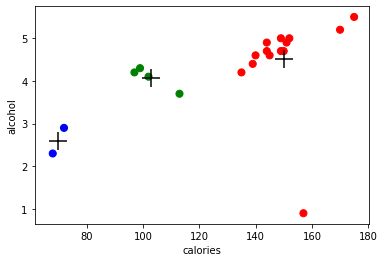

In [12]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster3], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9780FFA58>,
      dtype=object)

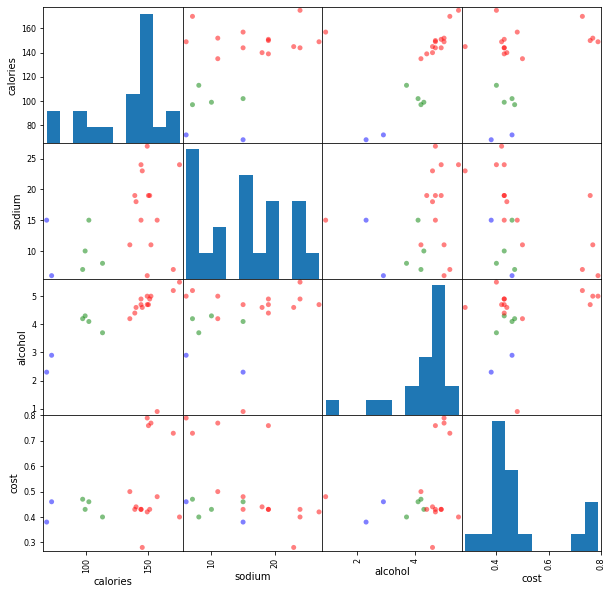

In [15]:
# scatter plot matrix (0=red, 1=green, 2=blue)
from pandas.plotting import scatter_matrix
scatter_matrix(X, c=colors[beer.cluster3], figsize=(10,10), s=100)

In [16]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-3.219647e-16,7.771561e-17,-1.003711e-15,-3.608225e-16
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-2.186883e+00,-1.395248e+00,-3.149822e+00,-1.519224e+00
25%,-7.554993e-01,-8.496201e-01,-6.129894e-02,-4.745363e-01
50%,3.879133e-01,7.794680e-03,3.395018e-01,-4.214165e-01
75%,5.996564e-01,6.313691e-01,6.224200e-01,-6.728499e-02
max,1.438159e+00,1.878518e+00,1.188256e+00,2.092917e+00


In [18]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [19]:
# save the cluster labels and sort by cluster
beer['cluster_3_a'] = km.labels_
beer.sort_values('cluster_3_a')

,name,calories,sodium,alcohol,cost,cluster3,cluster_3_a
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
10,Coors,140,18,4.6,0.44,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1
12,Michelob_Light,135,11,4.2,0.50,0,1


In [20]:
# review the cluster centers
beer.groupby('cluster_3_a').mean()

,calories,sodium,alcohol,cost,cluster3
cluster_3_a,,,,,
0,148.375,21.125,4.7875,0.4075,0
1,105.375,10.875,3.3250,0.4475,1
2,155.250,10.750,4.9750,0.7625,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9780FF588>,
      dtype=object)

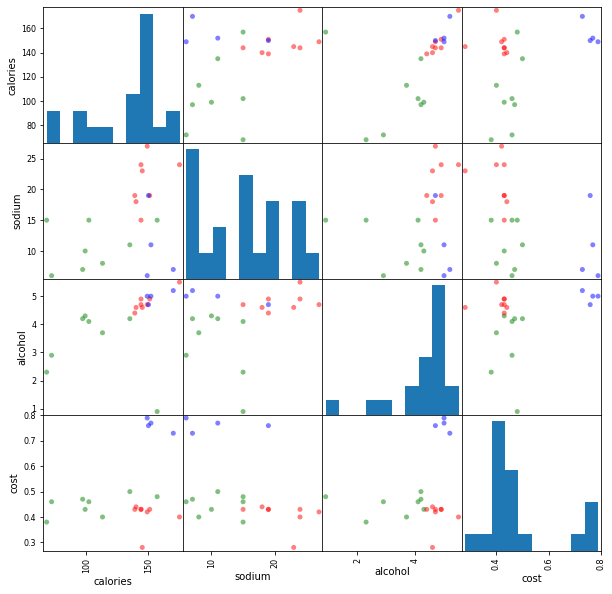

In [21]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
scatter_matrix(X, c=colors[beer.cluster_3_a], figsize=(10,10), s=100)

In [22]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [23]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

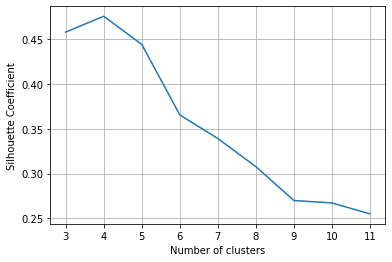

In [24]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [25]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster4'] = km.labels_
beer.sort_values('cluster4')

,name,calories,sodium,alcohol,cost,cluster3,cluster_3_a,cluster4
0,Budweiser,144,15,4.7,0.43,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0
16,Hamms,139,19,4.4,0.43,0,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0,0
6,Augsberger,175,24,5.5,0.40,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0
10,Coors,140,18,4.6,0.44,0,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,1
12,Michelob_Light,135,11,4.2,0.50,0,1,1


In [26]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=None, p=None)

In [27]:
# review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [28]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster3,cluster_3_a,cluster4,cluster
2,Lowenbrau,157,15,0.9,0.48,0,1,3,-1
5,Old_Milwaukee,145,23,4.6,0.28,0,0,0,-1
6,Augsberger,175,24,5.5,0.40,0,0,0,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,1,-1
13,Becks,150,19,4.7,0.76,0,2,2,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,1,-1
0,Budweiser,144,15,4.7,0.43,0,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0,0


In [29]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost,cluster3,cluster_3_a,cluster4
cluster,,,,,,,
-1,127.833333,17.0,3.483333,0.460000,0.666667,0.833333,1.166667
0,143.142857,19.0,4.628571,0.440000,0.000000,0.142857,0.142857
1,157.000000,8.0,5.066667,0.763333,0.000000,2.000000,2.000000
2,102.750000,10.0,4.075000,0.440000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E97902D128>,
      dtype=object)

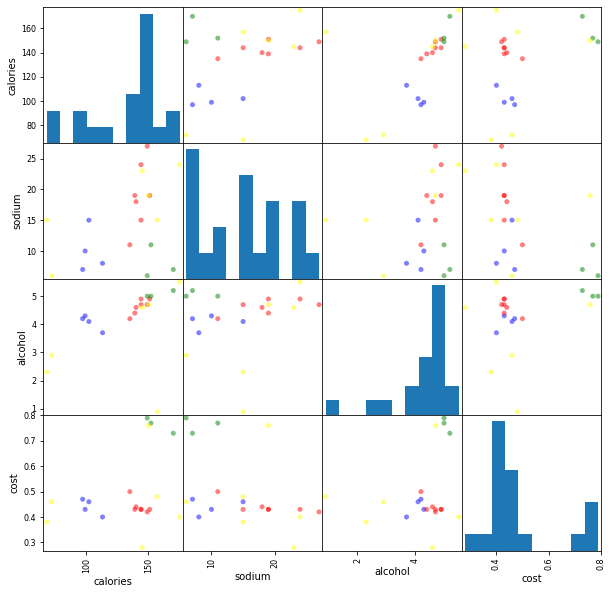

In [30]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)